# 2023 CITS4012 Assignment
*Make sure you change the file name with your student id.*

# Readme
*If there is something to be noted for the marker, please mention here.* 

*If you are planning to implement a program with Object Oriented Programming style, please check the bottom of the this ipynb file*

# 1.DataSet Processing
(You can add as many code blocks and text blocks as you need. However, YOU SHOULD NOT MODIFY the section title) 

In [3]:


from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

train_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/project1/WikiQA-train.tsv', sep='\t')
test_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/project1/WikiQA-test.tsv', sep='\t')
train_df.head()

Mounted at /content/drive


,QuestionID,Question,DocumentID,DocumentTitle,SentenceID,Sentence,Label
0,Q1,how are glacier caves formed?,D1,Glacier cave,D1-0,A partly submerged glacier cave on Perito More...,0
1,Q1,how are glacier caves formed?,D1,Glacier cave,D1-1,The ice facade is approximately 60 m high,0
2,Q1,how are glacier caves formed?,D1,Glacier cave,D1-2,Ice formations in the Titlis glacier cave,0
3,Q1,how are glacier caves formed?,D1,Glacier cave,D1-3,A glacier cave is a cave formed within the ice...,1
4,Q1,how are glacier caves formed?,D1,Glacier cave,D1-4,"Glacier caves are often called ice caves , but...",0


Dividing the dataset into three data frames: Question, Answer and Document

In [5]:
#Training DataSet
#Question Dataframe
question_df = train_df[["DocumentID", 'QuestionID', 'Question']]
question_df = question_df.drop_duplicates()
question_df

#Document Dataframe
document_df = train_df.groupby('DocumentID')['Sentence'].apply(lambda x: ' '.join(x)).reset_index()
document_df

#Answer Dataframe
#label=1
answer_df = train_df[['DocumentID', 'Sentence', 'Label']]
answer_df = answer_df[answer_df['Label'] == 1]
question_df.head()

,DocumentID,QuestionID,Question
0,D1,Q1,how are glacier caves formed?
5,D2,Q2,How are the directions of the velocity and for...
12,D5,Q5,how did apollo creed die
20,D6,Q6,how long is the term for federal judges
27,D7,Q7,how a beretta model 21 pistols magazines works


In [6]:
#Testing DataSet
#Question Dataframe
ques_test_df = test_df[["DocumentID", 'QuestionID', 'Question']]
ques_test_df = ques_test_df.drop_duplicates()
ques_test_df

#Document Dataframe
doc_test_df = test_df.groupby('DocumentID')['Sentence'].apply(lambda x: ' '.join(x)).reset_index()
doc_test_df

#Answer Dataframe
#label=1
ans_test_df = test_df[['DocumentID', 'Sentence', 'Label']]
ans_test_df = ans_test_df[ans_test_df['Label'] == 1]
ans_test_df.head()

,DocumentID,Sentence,Label
5,D0,"As such, African immigrants are to be distingu...",1
21,D4,Pumps operate by some mechanism (typically rec...,1
26,D20,"The actress who played Lolita, Sue Lyon , was ...",1
29,D33,"An antibody (Ab), also known as an immunoglobu...",1
30,D33,The antibody recognizes a unique part of the f...,1


Pre processing the data

In [7]:
#importing required libraries
import re
import nltk
nltk.download('punkt')
#to remove stop words
nltk.download('stopwords')
from nltk.corpus import stopwords as sw
#Tokkenization
from nltk.tokenize import word_tokenize
#Lemmatisation
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
#Stemming
from nltk.stem.porter import *
stemmer = PorterStemmer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [8]:
#preprocessing
def preprocessing(text):
  #case folding and removing punctuations
  text = ' '.join(word.lower() for word in text.split(" "))
  text = re.sub(r'[^\w\s]','',text)
  #tokenization
  tokens = word_tokenize(text)
  #removing stop words
  stop_words = sw.words()
  filtered_sentence = [w for w in tokens if not w in stop_words]

  return filtered_sentence
    

In [9]:
#training dataset preprocessing
question_df.Question = question_df.Question.apply(preprocessing)
document_df.Sentence = document_df.Sentence.apply(preprocessing)
answer_df.Sentence = answer_df.Sentence.apply(preprocessing)

In [10]:
document_df

,DocumentID,Sentence
0,D1,"[partly, submerged, glacier, cave, perito, mor..."
1,D10,"[outdoor, wood, boiler, variant, classic, wood..."
2,D100,"[simplified, internal, structure, chloroplast,..."
3,D1000,"[susquehanna, steam, electric, station, boilin..."
4,D1001,"[photograph, berlin, wall, west, side, wall, b..."
...,...,...
1989,D993,"[computer, science, array, programming, langua..."
1990,D994,"[united, states, annuity, contract, created, i..."
1991,D997,"[president, barack, obama, barack, obama, supr..."
1992,D998,"[list, airports, mexico, sorted, location, mex..."


In [11]:
#testing dataset preprocessing
ans_test_df
ques_test_df.Question = ques_test_df.Question.apply(preprocessing)
doc_test_df.Sentence = doc_test_df.Sentence.apply(preprocessing)
ans_test_df.Sentence = ans_test_df.Sentence.apply(preprocessing)

In [12]:
ans_test_df

,DocumentID,Sentence,Label
5,D0,"[african, immigrants, distinguished, african, ...",1
21,D4,"[pumps, operate, mechanism, typically, recipro...",1
26,D20,"[actress, played, lolita, lyon, fourteen, time...",1
29,D33,"[antibody, immunoglobulin, ig, large, yshaped,...",1
30,D33,"[antibody, recognizes, unique, part, foreign, ...",1
...,...,...,...
6039,D2762,"[agent, stimulates, bodys, immune, system, rec...",1
6043,D2766,"[preciosa, luxury, brand, range, precisioncut,...",1
6045,D2673,"[formed, 2005, gained, popularity, disney, cha...",1
6060,D2776,"[married, democratic, political, consultant, j...",1


In [13]:
#Lemmatization
def word_lemma(text):
    lemma_text = [lemmatizer.lemmatize(i) for i in text]
    return lemma_text

In [ ]:
question_df['Question'].apply(lambda x: word_lemma(x))

0                                  [glacier, cave, formed]
5        [direction, velocity, force, vector, related, ...
12                                         [apollo, creed]
20                            [long, term, federal, judge]
27            [beretta, model, 21, pistol, magazine, work]
                               ...                        
20316                      [blue, mountain, state, filmed]
20322                           [apple, computer, founded]
20334                                   [section, housing]
20344                                   [type, restaurant]
20345                               [dollar, worth, based]
Name: Question, Length: 2117, dtype: object

In [ ]:
ans_test_df['Sentence'].apply(lambda x: word_lemma(x))

5       [african, immigrant, distinguished, african, a...
21      [pump, operate, mechanism, typically, reciproc...
26      [actress, played, lolita, lyon, fourteen, time...
29      [antibody, immunoglobulin, ig, large, yshaped,...
30      [antibody, recognizes, unique, part, foreign, ...
                              ...                        
6039    [agent, stimulates, body, immune, system, reco...
6043    [preciosa, luxury, brand, range, precisioncut,...
6045    [formed, 2005, gained, popularity, disney, cha...
6060    [married, democratic, political, consultant, j...
6063    [brisket, cut, meat, breast, lower, chest, bee...
Name: Sentence, Length: 291, dtype: object

In [15]:
#Setmming
def word_stemmer(text):
    stem_text = [stemmer.stem(i) for i in text]
    return stem_text

Stemming provides a much more different result than Lemmatization does.

In [16]:
#choose stemming over lemmatization for data and saving the results in dataframe for training dataset
question_df['Question'] = question_df['Question'].apply(lambda x: word_stemmer(x))
document_df['doc_Sentence'] = document_df['Sentence'].apply(lambda x: word_stemmer(x))
answer_df['Sentence'] = answer_df['Sentence'].apply(lambda x: word_stemmer(x))

In [17]:
#stemming for test dataset
ques_test_df['Question'] = ques_test_df['Question'].apply(lambda x: word_stemmer(x))
doc_test_df['doc_Sentence'] = doc_test_df['Sentence'].apply(lambda x: word_stemmer(x))
ans_test_df['Sentence'] = ans_test_df['Sentence'].apply(lambda x: word_stemmer(x))

In [18]:
#Dropping the "Sentence" column from document dataframe to avoid confusion (as it is replaced by "doc_Sentence" column)
document_df=document_df.drop(["Sentence"], axis = 1)
doc_test_df=doc_test_df.drop(["Sentence"], axis = 1)

In [19]:
answer_df

,DocumentID,Sentence,Label
3,D1,"[glacier, cave, cave, form, ice, glacier]",1
75,D16,"[tablespoon, capac, 15, ml]",1
83,D16,"[usa, tablespoon, measur, unit, approxim, 15, ...",1
84,D16,"[australia, tablespoon, measur, unit, 20, ml]",1
98,D17,"[seri, origin, tiein, merchandis, make, harri,...",1
...,...,...,...
20292,D2802,"[turn, 21st, centuri, expand, domain, econom, ...",1
20307,D1876,"[median, household, incom, fell, 51144, 2010, ...",1
20325,D2806,"[compani, found, april, 1, 1976, incorpor, app...",1
20335,D2807,"[section, 8, hous, act, 1937, simpli, section,...",1


Extracting Sentences and Questions from all the dataframes into a separate list and also in a list of list

In [20]:
#training dataset
#answer df
#all tokens in a single list
answer_sent = []
for lst in answer_df['Sentence']:
    answer_sent += lst
#list of actual answers for training data
answer_list = answer_df['Sentence'].tolist()
#document df
#all tokens in a single list
document_sent = []
for lst in document_df['doc_Sentence']:
    document_sent += lst
# list of all the answers from training data
document_list = document_df['doc_Sentence'].tolist()
#answer df
#all tokens in a single list
question_sent = []
for lst in question_df['Question']:
    question_sent += lst
#list of questions from training data
question_list = question_df['Question'].tolist()

In [21]:
question_list[:3]

[['glacier', 'cave', 'form'],
 ['direct', 'veloc', 'forc', 'vector', 'relat', 'circular', 'motion'],
 ['apollo', 'creed']]

In [22]:
answer_sent[:4]

['glacier', 'cave', 'cave', 'form']

In [23]:
#testing dataset
#answer df
#all tokens in a single list
ans_test_sent = []
for lst in ans_test_df['Sentence']:
    ans_test_sent += lst
#list of actual answers for testing data
ans_test_list = ans_test_df['Sentence'].tolist()
#document df
#all tokens in a single list
doc_test_sent = []
for lst in doc_test_df['doc_Sentence']:
    doc_test_sent += lst
# list of all the answers from testing data
doc_test_list = doc_test_df['doc_Sentence'].tolist()
#answer df
#all tokens in a single list
ques_test_sent = []
for lst in ques_test_df['Question']:
    ques_test_sent += lst
#list of questions from testing data
ques_test_list = ques_test_df['Question'].tolist()

In [24]:
ques_test_list[:3]

[['african', 'american', 'immigr'],
 ['larg', 'earli', 'jail'],
 ['water', 'pump', 'work']]

Addin special tokens indicating: <BOS> beginning of sentence and <EOS> end of sentence

In [25]:
#lab 7
#training dataset
input_token_list = question_list # -> input to encoder
# Adding special tokens for generation: <BOS> indicates beginning of sentence, <EOS> means end of sentence.
output_token_list = [["<BOS>"] + s for s in document_list] # -> input to decoder during the teacher-forcing training
target_token_list = [s + ["<EOS>"] for s in answer_list] # -> ground truth to be compared with the decoder output
# Here we simply use the maximum sentence length 
MAX_LENGTH = max([len(s) for s in input_token_list] + [len(s) for s in target_token_list])
# set up a vocab to index dictionary
word_to_ix = {"<BOS>": 0, "<EOS>":1} 
for sentence in input_token_list+output_token_list:
    for word in sentence:
        if word not in word_to_ix:
            word_to_ix[word] = len(word_to_ix)
word_list = list(word_to_ix.keys())

In [26]:
MAX_LENGTH

110

In [27]:
#testing dataset
test_input_token_list = ques_test_list # -> input to encoder
# Adding special tokens for generation: <BOS> indicates beginning of sentence, <EOS> means end of sentence.
test_output_token_list = [["<BOS>"] + s for s in doc_test_list] # -> input to decoder during the teacher-forcing training
test_target_token_list = [s + ["<EOS>"] for s in ans_test_list] # -> ground truth to be compared with the decoder output
# Here we simply use the maximum sentence length 
test_MAX_LENGTH = max([len(s) for s in test_input_token_list] + [len(s) for s in test_target_token_list])
# set up a vocab to index dictionary
word_to_ix = {"<BOS>": 0, "<EOS>":1} 
for sentence in test_input_token_list+test_output_token_list:
    for word in sentence:
        if word not in word_to_ix:
            word_to_ix[word] = len(word_to_ix)
word_list = list(word_to_ix.keys())

In [28]:
test_MAX_LENGTH

40

In [29]:
# construct token index lists for input, output and target
# i.e., to convert each sequence into corresponding index based on the index dictionary we created in the previous section
# e.g., ['are', 'your', 'systems', 'functioning'] -> [42, 6, 2576, 2577]
def to_index(data, to_ix):
    input_index_list = []
    for sent in data:
      indexed_sent = []
      for w in sent:
        if w in to_ix:
          indexed_sent.append(to_ix[w])
        else:
          indexed_sent.append(to_ix['<UNK>'])  # Assign a special index for unknown words
        input_index_list.append(indexed_sent)
    return input_index_list

# Define the special index for unknown words
word_to_ix['<UNK>'] = len(word_to_ix)

In [30]:
#training dataset indexing
input_index = to_index(input_token_list, word_to_ix)
output_index = to_index(output_token_list, word_to_ix)
target_index = to_index(target_token_list, word_to_ix)

In [31]:
#testing data indexing
test_input_index = to_index(test_input_token_list, word_to_ix)
test_output_index = to_index(test_output_token_list, word_to_ix)
test_target_index = to_index(test_target_token_list, word_to_ix)

# 2.QA Model Implementation

1.   List item
2.   List item


(You can add as many code blocks and text blocks as you need. However, YOU SHOULD NOT MODIFY the section title) 

**Word Embedding**

In [32]:
import gensim.downloader as api
import pprint
import re
# For implementing the word2vec family of algorithms
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from gensim.models import FastText

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Calculating similarity scores for all three dataframes

In [33]:
from collections import Counter
# Get the count of each word.
train_ans_count = Counter(answer_sent)
train_doc_count = Counter(document_sent)
train_ques_count = Counter(question_sent)

# Use most_common() method from Counter subclass
print("Training Answer Dataframe:", train_ans_count.most_common(4))
print("Training Document Dataframe:", train_doc_count.most_common(4))
print("Training Question Dataframe:", train_ques_count.most_common(4))

Training Answer Dataframe: [('state', 192), ('unit', 144), ('american', 90), ('citi', 46)]
Training Document Dataframe: [('state', 1926), ('unit', 1438), ('includ', 1028), ('world', 896)]
Training Question Dataframe: [('made', 55), ('state', 54), ('play', 39), ('world', 38)]


In [34]:
#training dataset : Answer Dataframe
#CBOW
wv_cbow_model_ans = Word2Vec(sentences=answer_list, vector_size=100, window=5, min_count=5, workers=2, sg=0)
# Now we switch to a Skip Gram model by setting parameter sg=1
wv_sg_model_ans = Word2Vec(sentences=answer_list, vector_size=100, window=5, min_count=5, workers=2, sg=1)
#FastText
# Now we initialize and train FastText with Skip Gram architecture (sg=1)
ft_sg_model_ans = FastText(answer_list, vector_size=100, window=5, min_count=5, workers=2, sg=1)
# Now we initialize and train FastText with CBOW architecture (sg=0)
ft_cbow_model_ans = FastText(answer_list, vector_size=100, window=5, min_count=5, workers=2, sg=0)



# most_similar() computes cosine similarity between a simple mean of the vectors of the given words and the vectors for each word in the model
ans_word = "state" # -> top n-word
train_ans_cbow_words= wv_cbow_model_ans.wv.most_similar(ans_word)
train_ans_sg_words = wv_sg_model_ans.wv.most_similar(ans_word)
train_ans_ft_cbow_words = ft_cbow_model_ans.wv.most_similar(ans_word)
train_ans_ft_sg_words = ft_sg_model_ans.wv.most_similar(ans_word)


#printing scores
print("CBOW:")
pprint.pprint(train_ans_cbow_words)
print()
print("SkipGram:")
pprint.pprint(train_ans_sg_words)
print()
print("FastText w SkipGram: ")
pprint.pprint(train_ans_ft_sg_words)
print()
print("FastText w CBOW: ")
pprint.pprint(train_ans_ft_cbow_words)

CBOW:
[('american', 0.8405037522315979),
 ('unit', 0.8252871036529541),
 ('feder', 0.8107151985168457),
 ('refer', 0.8051062822341919),
 ('record', 0.8018286824226379),
 ('south', 0.7965969443321228),
 ('world', 0.7907094359397888),
 ('part', 0.7893386483192444),
 ('februari', 0.7834812998771667),
 ('song', 0.7799398303031921)]

SkipGram:
[('part', 0.9985586404800415),
 ('american', 0.998537003993988),
 ('south', 0.9984728097915649),
 ('occur', 0.9984068274497986),
 ('refer', 0.9983957409858704),
 ('unit', 0.9983778595924377),
 ('human', 0.9983769655227661),
 ('world', 0.9983153343200684),
 ('feder', 0.9982962608337402),
 ('base', 0.9982877373695374)]

FastText w SkipGram: 
[('statement', 0.9999526739120483),
 ('start', 0.9999263882637024),
 ('richard', 0.9999260902404785),
 ('product', 0.9999250769615173),
 ('produc', 0.999923825263977),
 ('american', 0.9999204277992249),
 ('present', 0.9999203681945801),
 ('charg', 0.9999201893806458),
 ('countri', 0.9999199509620667),
 ('stand', 0.9

In [35]:
#training dataset : Question Dataframe
#CBOW
wv_cbow_model_ques = Word2Vec(sentences=question_list, vector_size=100, window=5, min_count=5, workers=2, sg=0)
# Now we switch to a Skip Gram model by setting parameter sg=1
wv_sg_model_ques = Word2Vec(sentences=question_list, vector_size=100, window=5, min_count=5, workers=2, sg=1)
#FastText
# Now we initialize and train FastText with Skip Gram architecture (sg=1)
ft_sg_model_ques = FastText(question_list, vector_size=100, window=5, min_count=5, workers=2, sg=1)
# Now we initialize and train FastText with CBOW architecture (sg=0)
ft_cbow_model_ques = FastText(question_list, vector_size=100, window=5, min_count=5, workers=2, sg=0)


# most_similar() computes cosine similarity between a simple mean of the vectors of the given words and the vectors for each word in the model
ques_word = "made" # -> top n-word
train_ques_cbow_words= wv_cbow_model_ques.wv.most_similar(ques_word)
train_ques_sg_words = wv_sg_model_ques.wv.most_similar(ques_word)
train_ques_ft_cbow_words = ft_cbow_model_ques.wv.most_similar(ques_word)
train_ques_ft_sg_words = ft_sg_model_ques.wv.most_similar(ques_word)


#printing scores
# print("CBOW:")
# pprint.pprint(train_ques_cbow_words)
# print()
# print("SkipGram:")
# pprint.pprint(train_ques_sg_words)
# print()
# print("FastText w SkipGram: ")
# pprint.pprint(train_ques_ft_sg_words)
# print()
# print("FastText w CBOW: ")
# pprint.pprint(train_ques_ft_cbow_words)

In [36]:
#training dataset : Document Dataframe
#CBOW
wv_cbow_model_doc = Word2Vec(sentences=document_list, vector_size=100, window=5, min_count=5, workers=2, sg=0)
# Now we switch to a Skip Gram model by setting parameter sg=1
wv_sg_model_doc = Word2Vec(sentences=document_list, vector_size=100, window=5, min_count=5, workers=2, sg=1)
#FastText
# Now we initialize and train FastText with Skip Gram architecture (sg=1)
ft_sg_model_doc = FastText(document_list, vector_size=100, window=5, min_count=5, workers=2, sg=1)
# Now we initialize and train FastText with CBOW architecture (sg=0)
ft_cbow_model_doc = FastText(document_list, vector_size=100, window=5, min_count=5, workers=2, sg=0)



# most_similar() computes cosine similarity between a simple mean of the vectors of the given words and the vectors for each word in the model
doc_word = "state" # -> top n-word
train_doc_cbow_words= wv_cbow_model_doc.wv.most_similar(doc_word)
train_doc_sg_words = wv_sg_model_doc.wv.most_similar(doc_word)
train_doc_ft_cbow_words = ft_cbow_model_doc.wv.most_similar(doc_word)
train_doc_ft_sg_words = ft_sg_model_doc.wv.most_similar(doc_word)


# #printing scores
# print("CBOW:")
# pprint.pprint(train_ans_cbow_words)
# print()
# print("SkipGram:")
# pprint.pprint(train_ans_sg_words)
# print()
# print("FastText w SkipGram: ")
# pprint.pprint(train_ans_ft_sg_words)
# print()
# print("FastText w CBOW: ")
# pprint.pprint(train_ans_ft_cbow_words)

From the above results, FastText gives slightly better results with Skip Gram



In [37]:
#testing similarity for gloVe
#using pretraineed word embeddings with Gensim
# Load GloVe
model = api.load("glove-wiki-gigaword-100")

def find_synonym(word):
  word_vec = model[word]
  # Find synonym and return the synonym from the given words list for the given word 
  similarity_scores = {w: model.similarity(word,w) for w in answer_sent if w!=word}
  synonym = max(similarity_scores, key=similarity_scores.get)
  synonym = max(similarity_scores, key=similarity_scores.get)
  return synonym

[=================================================-] 98.9% 126.7/128.1MB downloaded


In [38]:
#below is the similarity calculated between words "state" and "statement" from dataset Answer Training
#looking at the similarity score, it is much less than the similarity score we obtained in the FastText - SkipGram model
print(model.similarity("state","statement"))

0.50768965


**Feature Extraction**

TF-IDF

In [42]:
#tf-idf
import numpy as np
import math

def tfidf_fun(x_list):
  DF= {}

  for i in x_list:
      # get each unique word in the x list - and count the number of occurrences in each word
      for term in np.unique(i):
          try:
            DF[term] +=1
          except:
              DF[term] =1


  # Calculating tf, tf-idf
  tf_idf = {}
  N=len(x_list)
  list_id = 0
  for word in x_list:
    # initialise counter for the answer
    counter = Counter(word)
    # calculate total number of words in the doc
    total_num_words = len(word)  

  # get each unique word in the answer
  for term in np.unique(word):
    # calculate Term Frequency (TF) 
    tf = counter[term]/total_num_words
    
    # get the calculated Document Frequency (DF)
    df = DF[term]

    # calculate Inverse Document Frequency (IDF)
    idf = math.log(N/(df+1))+1

    # calculate TF-IDF
    tf_idf[list_id, term] = tf*idf

  list_id += 1

  # sort the dictionary based on the TF-IDF values 
    
  sorted_tfidf = sorted(tf_idf.items(), key=lambda x: x[1], reverse=True)
  top1_tfidf_word = sorted_tfidf[0][0][1]
  
  return top1_tfidf_word


In [43]:
train_ans_tfidf = tfidf_fun(answer_sent)
print("The word with top-1 TF-IDF value for training Answer df is: " + train_ans_tfidf)
train_ques_tfidf = tfidf_fun(question_sent)
print("The word with top-1 TF-IDF value for training Question df is: " + train_ques_tfidf)
train_doc_tfidf = tfidf_fun(document_sent)
print("The word with top-1 TF-IDF value for training Document DF is: " + train_doc_tfidf)

The word with top-1 TF-IDF value for training Answer df is: household
The word with top-1 TF-IDF value for training Question df is: base
The word with top-1 TF-IDF value for training Document DF is: secur


In [44]:
test_ans_tfidf = tfidf_fun(ans_test_sent)
print("The word with top-1 TF-IDF value for testing Answer df is: " + test_ans_tfidf)
test_ques_tfidf = tfidf_fun(ques_test_sent)
print("The word with top-1 TF-IDF value for testing Question df is: " + test_ques_tfidf)
test_doc_tfidf = tfidf_fun(doc_test_sent)
print("The word with top-1 TF-IDF value for testing Document DF is: " + test_doc_tfidf)

The word with top-1 TF-IDF value for testing Answer df is: veal
The word with top-1 TF-IDF value for testing Question df is: mare
The word with top-1 TF-IDF value for testing Document DF is: america


PoS Tagging

Making vocabs with special and Padding

In [45]:
#Data Loader training set
from torch.utils.data import DataLoader
batch_size = 128
question_loader = DataLoader(dataset=question_df, batch_size=batch_size, shuffle=True)
document_loader = DataLoader(dataset=document_df, batch_size=batch_size, shuffle=True)
answer_loader = DataLoader(dataset=answer_df, batch_size=batch_size, shuffle=True)


#Data Loader testing set
ques_test_loader = DataLoader(dataset=ques_test_df, batch_size=batch_size, shuffle=True)
doc_test_loader = DataLoader(dataset=doc_test_df, batch_size=batch_size, shuffle=True)
ans_test_loader = DataLoader(dataset=ans_test_df, batch_size=batch_size, shuffle=True)

In [46]:
#creating a separate function to create the special tokens
def special_tokens(train_answers, train_answer_tags):
  # First, let's get the unique words and tags from the corpus above
  words, tags = set([]), set([])

  for s in train_answers:
      for w in s:
          words.add(w.lower())

  for ts in train_answer_tags:
      for t in ts:
          tags.add(t)
  # Now, let's add the special tokens for padding and out-of-vocabulary to the unique words as our final vocab
  # For better illustration, let's make them as the first and second tokens in our vocab, i.e.,
  # word2index['[PAD]'] = 0  
  # word2index['[OOV]'] = 1  
  vocab = ['[PAD]', '[OOV]']
  vocab.extend(list(words))
  word2index = {w: i for i, w in enumerate(vocab)} # Dictionary for mapping a word to a unique word index

  tag2index = {t: i + 2 for i, t in enumerate(list(tags))} # Dictionary for mapping a POS tag to a unique tag index
  tag2index['[PAD]'] = 0  # The special value used to tag padding
  tag2index['[OOV]'] = 1  # The special value used to tag OOVs

  index2tag = {i: t for t, i in tag2index.items()} # Dictionary for mapping a unique index tag index back to the corresponding POS tag, which is useful when doing the actual predictions

  # Create the Embedding lookup table for the first pre-trained embedding
  import numpy as np
  emb_dim = model.vector_size

  emb_table = []
  for i, word in enumerate(vocab):
      if word in model:
          emb_table.append(model[word])
      else:
          # The pretrained glove twitter does not contain the embeddings for the [PAD] and [OOV] tokens we defined
          # Here, we just use all 0 for both [PAD] and [OOV] tokens for simplicity
          emb_table.append([0]*emb_dim)
  emb_table = np.array(emb_table)
  print("Shape of emb_table: ", emb_table.shape)

  # Convert the word into index, which can be used for looking up the corresponding word embeddings later
  def encode_sentences(sentences):
      res = []
      for sent in sentences:
          # For any word that is not in our word vocab, use [OOV] for representating it
          temp = [ word2index[word.lower()] if word.lower() in word2index else word2index['[OOV]'] for word in sent]
          res.append(temp)
      return res


  # Encode both train and test set using the conversion function encode_sentences() defined above
  train_sentences_encoded = encode_sentences(train_answers)
  # test_sentences_encoded = encode_sentences(test_answer)


  # Convert the POS tag into index as ground truth for training and evaluation
  def tag_to_index(tags_list):
      res = []
      for tags in tags_list:
          # For any tag that is not in our tag vocab, use [OOV] for representating it
          temp = [tag2index[tag] if tag in tag2index else tag2index['[OOV]'] for tag in tags]
          res.append(temp)
      return res

  # Encode both train and test set tags using the conversion function tag_to_index() defined above
  train_tags_y, test_tags_y = [], []
  train_tags_y = tag_to_index(train_answer_tags)
  # test_tags_y = tag_to_index(ans_test_tags)

  #Padding
  # Let's decide the max length, simply based on the max length of the training set
  max_length = len(max(train_sentences_encoded, key=len))
  print("Maximum length of the training set: ", max_length)

  # Pad the sequence based on the max length defined, to make sure the list of sequences are of same length
  def pad_sequence(seq_list, max_length, index_dict):
      res = []
      for seq in seq_list:
          temp = seq[:]
          # If original length is greater than the defined max length, trim it
          if len(seq)>max_length:
              res.append(temp[:max_length])
          else: # If original length is less than the defined max length, pad it
              temp += [index_dict['[PAD]']] * (max_length - len(seq))
              res.append(temp)
      return np.array(res)

  # Pad the train and test set using the pad_sequence() function defined above, for both input (words) and labels (tags)
  train_sentences_encoded_pad = pad_sequence(train_sentences_encoded, max_length, word2index)
  train_tags_y_pad = pad_sequence(train_tags_y, max_length, tag2index)
  # test_tags_y = tag_to_index(test_tags)

Bi-LSTM based PoS Tagger

In [47]:
# answer_df["pos_tags"] = answer_df["Sentence"].apply(lambda x: nltk.pos_tag(x))

# Convert POS tags to numerical labels
pos_to_num = {"NN": 1, "NNS": 2, "NNP": 3, "NNPS": 4, "VB": 5, "VBD": 6, "VBG": 7, "VBN": 8, "VBP": 9, "VBZ": 10,
              "JJ": 11, "JJR": 12, "JJS": 13, "RB": 14, "RBR": 15, "RBS": 16, "IN": 17, "PRP": 18, "PRP$": 19,
              "WP": 20, "WP$": 21, "MD": 22, "CC": 23, "CD": 24, "DT": 25, "EX": 26, "FW": 27, "LS": 28, "PDT": 29,
              "POS": 30, "RP": 31, "SYM": 32, "TO": 33, "UH": 34, "WDT": 35, "WRB": 36, "#": 37, "$": 38, "\"": 39,
              "(": 40, ")": 41, ",": 42, ".": 43, ":": 44, "``": 45, "''": 46, "-LRB-": 47, "-RRB-": 48, "HT": 49,
              "FW|SYM": 50, "NN|SYM": 51, "NNP|SYM": 52}


# answer_df["pos_labels"] = answer_df["pos_tags"].apply(lambda x: [pos_to_num.get(tag[1], 0) for tag in x])

In [48]:
# Import the POS tagger
from nltk.tag import pos_tag
# download the dependency and resource as required
nltk.download('averaged_perceptron_tagger')

#POS TAGGING FOR TRAINING DATASET
ans_tag = pos_tag(answer_sent)
doc_tag = pos_tag(document_sent)
ques_tag = pos_tag(question_sent)

print(ans_tag[0])
print(doc_tag[0])
print(ques_tag[0])

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


('glacier', 'NN')
('partli', 'NN')
('glacier', 'NN')


In [49]:
#POS TAGGING FOR TESTING DATASET
test_ans_tag = pos_tag(ans_test_sent)
test_doc_tag = pos_tag(doc_test_sent)
test_ques_tag = pos_tag(ques_test_sent)

print(test_ans_tag[0])
print(test_doc_tag[4])
print(test_ques_tag[9])

('african', 'JJ')
('refer', 'VBP')
('lyon', 'NN')


In [50]:
import numpy as np

def pos_tag_fun(x_list, tag):
  tagged_sentences = []
  for sentence in x_list:
    tagged = nltk.pos_tag(sentence)
    tagged_sentences.append(tagged)
  
  print(tagged_sentences[0])


  # Extract the sentences and the corresponding POS tags
  train_x_list, train_tag_tags =[], []
  for tagged_sentence in tagged_sentences:
    if tagged_sentence:
      sentence, tags = zip(*tagged_sentence)
      train_x_list.append(np.array(sentence))
      train_tag_tags.append(np.array(tags))

  print(tagged_sentences[0])
  print("Tagged sentences: ", len(tagged_sentences))
  print("Tagged words:", len(tag))
  
  print(train_x_list[0])
  print(train_tag_tags[0])

  #calling the special toekn function
  x_list_special_tok = special_tokens(train_x_list, train_tag_tags)

In [51]:
ques_list = pos_tag_fun(question_list, ques_tag)

[('glacier', 'NN'), ('cave', 'VBP'), ('form', 'NN')]
[('glacier', 'NN'), ('cave', 'VBP'), ('form', 'NN')]
Tagged sentences:  2117
Tagged words: 6668
['glacier' 'cave' 'form']
['NN' 'VBP' 'NN']
Shape of emb_table:  (3261, 100)
Maximum length of the training set:  12


In [52]:
ans_list = pos_tag_fun(answer_list, ans_tag)

[('glacier', 'NN'), ('cave', 'VBP'), ('cave', 'VBN'), ('form', 'NN'), ('ice', 'NN'), ('glacier', 'NN')]
[('glacier', 'NN'), ('cave', 'VBP'), ('cave', 'VBN'), ('form', 'NN'), ('ice', 'NN'), ('glacier', 'NN')]
Tagged sentences:  1039
Tagged words: 14731
['glacier' 'cave' 'cave' 'form' 'ice' 'glacier']
['NN' 'VBP' 'VBN' 'NN' 'NN' 'NN']
Shape of emb_table:  (5419, 100)
Maximum length of the training set:  109


In [53]:
doc_list = pos_tag_fun(document_list, doc_tag)

[('partli', 'NN'), ('submerg', 'NN'), ('glacier', 'NN'), ('cave', 'VBP'), ('perito', 'VBN'), ('moreno', 'NNS'), ('glacier', 'RBR'), ('ice', 'RB'), ('facad', 'JJ'), ('approxim', 'IN'), ('60', 'CD'), ('high', 'JJ'), ('ice', 'NN'), ('format', 'NNS'), ('titli', 'VBP'), ('glacier', 'JJR'), ('cave', 'VBP'), ('glacier', 'JJR'), ('cave', 'VBP'), ('cave', 'JJ'), ('form', 'NN'), ('ice', 'NN'), ('glacier', 'NN'), ('glacier', 'NN'), ('cave', 'VBP'), ('call', 'NN'), ('ice', 'NN'), ('cave', 'VBP'), ('term', 'NN'), ('properli', 'NN'), ('describ', 'NN'), ('bedrock', 'NN'), ('cave', 'VBP'), ('contain', 'NN'), ('yearround', 'NN'), ('ice', 'NN')]
[('partli', 'NN'), ('submerg', 'NN'), ('glacier', 'NN'), ('cave', 'VBP'), ('perito', 'VBN'), ('moreno', 'NNS'), ('glacier', 'RBR'), ('ice', 'RB'), ('facad', 'JJ'), ('approxim', 'IN'), ('60', 'CD'), ('high', 'JJ'), ('ice', 'NN'), ('format', 'NNS'), ('titli', 'VBP'), ('glacier', 'JJR'), ('cave', 'VBP'), ('glacier', 'JJR'), ('cave', 'VBP'), ('cave', 'JJ'), ('form',

In [54]:
test_ans_pos = pos_tag_fun(ans_test_list, test_ans_tag)

[('african', 'JJ'), ('immigr', 'NN'), ('distinguish', 'JJ'), ('african', 'JJ'), ('american', 'JJ'), ('latter', 'NN'), ('descend', 'NN'), ('west', 'JJ'), ('central', 'JJ'), ('african', 'JJ'), ('involuntarili', 'NN'), ('brought', 'VBD'), ('unit', 'NN'), ('state', 'NN'), ('mean', 'JJ'), ('histor', 'NN'), ('atlant', 'NN'), ('slave', 'VBP'), ('trade', 'NN')]
[('african', 'JJ'), ('immigr', 'NN'), ('distinguish', 'JJ'), ('african', 'JJ'), ('american', 'JJ'), ('latter', 'NN'), ('descend', 'NN'), ('west', 'JJ'), ('central', 'JJ'), ('african', 'JJ'), ('involuntarili', 'NN'), ('brought', 'VBD'), ('unit', 'NN'), ('state', 'NN'), ('mean', 'JJ'), ('histor', 'NN'), ('atlant', 'NN'), ('slave', 'VBP'), ('trade', 'NN')]
Tagged sentences:  291
Tagged words: 3925
['african' 'immigr' 'distinguish' 'african' 'american' 'latter' 'descend'
 'west' 'central' 'african' 'involuntarili' 'brought' 'unit' 'state'
 'mean' 'histor' 'atlant' 'slave' 'trade']
['JJ' 'NN' 'JJ' 'JJ' 'JJ' 'NN' 'NN' 'JJ' 'JJ' 'JJ' 'NN' 'VBD

Name Entity Tagging

In [55]:
import spacy
import en_core_web_sm

# loading pre-trained model of NER
nlp = en_core_web_sm.load()

In [56]:
def net_fun(dataset):
  # Process each sample in the dataset
  for word in dataset:
    doc = nlp(word)

  print(doc)
  print(type(doc))

  # Iterate over the entities in doc.ents
  entities = []
  for entity in doc.ents:
    # Access the text and label of each entity
    entity_text = entity.text
    entity_label = entity.label_
    entities.append((entity_text, entity_label))
  
  return entities
  
  # Print the text and label of the entity
  print("Entity Text:", entities[0])
  print("Entity Label:", entities[1])
  print()

In [57]:
train_ans_net = net_fun(answer_sent)

household
<class 'spacy.tokens.doc.Doc'>


In [58]:
train_ques_net = net_fun(question_sent)
train_doc_net = net_fun(document_sent)

base
<class 'spacy.tokens.doc.Doc'>


KeyboardInterrupt: ignored

Sequence QA Model (RNN based Seq2Seq Model)

In [60]:
# from sklearn.model_selection import train_test_split
# # Split the data into trainning set and test set using sklearn
# (train_sentences, test_sentences, train_tags, test_tags) = train_test_split(sentences, sentence_tags, test_size=0.2, random_state = 42)

In [61]:
import torch
import torch
import torch.nn as nn
from torch import optim
import torch.nn.functional as F

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

Encoder

In [62]:
class EncoderRNN(nn.Module):
    def __init__(self, hidden_size, embedding):
        super(EncoderRNN, self).__init__()
        self.hidden_size = hidden_size

        self.embedding = embedding
        # you can easily replace it with other RNN-based variants such as the valina RNN or LSTM
        self.gru = nn.GRU(hidden_size, hidden_size) 
        

    def forward(self, input, hidden):
        embedded = self.embedding(input).view(1, 1, -1)
        output, hidden = self.gru(embedded, hidden) 
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, 1, self.hidden_size, device=device)

Decoder

In [63]:
class AttnDecoderRNN(nn.Module):
    ATTN_TYPE_DOT_PRODUCT = "Dot Product"
    #scaled dot product attention
    ATTN_TYPE_SCALE_DOT_PRODUCT = "Scale Dot Product"
    #cosine attention calc
    ATTN_TYPE_COSINE = "Cosine"

    def __init__(self, hidden_size, output_size, embedding, dropout_p=0.1, max_length=MAX_LENGTH):
        super(AttnDecoderRNN, self).__init__()
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.dropout_p = dropout_p
        self.max_length = max_length

        self.embedding = embedding
        self.dropout = nn.Dropout(self.dropout_p)
        self.gru = nn.GRU(self.hidden_size, self.hidden_size)
        self.out = nn.Linear(self.hidden_size*2, self.output_size)


    def cal_attention(self, hidden, encoder_hiddens, method):
        #dot-product
        if method == AttnDecoderRNN.ATTN_TYPE_DOT_PRODUCT:
            # bmm: https://pytorch.org/docs/master/generated/torch.bmm.html
            attn_weights = F.softmax(torch.bmm(hidden, encoder_hiddens.T.unsqueeze(0)),dim=-1) 
            attn_output = torch.bmm(attn_weights, encoder_hiddens.unsqueeze(0))
            concat_output = torch.cat((attn_output[0], hidden[0]), 1)
        #scaled-dot-product
        elif method == AttnDecoderRNN.ATTN_TYPE_SCALE_DOT_PRODUCT:
            attn_weights = F.softmax(torch.bmm(hidden, encoder_hiddens.T.unsqueeze(0)), dim=-1)
            attn_output = torch.bmm(attn_weights, encoder_hiddens.unsqueeze(0))
            concat_output = torch.cat((attn_output[0], hidden[-1])/np.sqrt(hidden_size), 1)
        #cosine attention calculation
        elif method == AttnDecoderRNN.ATTN_TYPE_COSINE:
            similarities = F.cosine_similarity(hidden, encoder_hiddens, dim=-1)
            attn_weights = F.softmax(similarities, dim=0)
            attn_output = torch.bmm(attn_weights.unsqueeze(0), encoder_hiddens.unsqueeze(0))
            concat_output = torch.cat((attn_output[0], hidden[0]), 1)

        return concat_output

    def forward(self, input, hidden, encoder_hiddens):
        embedded = self.embedding(input).view(1, 1, -1)
        embedded = self.dropout(embedded)

        _, hidden = self.gru(embedded, hidden)

        concat_output = self.cal_attention(hidden, encoder_hiddens, AttnDecoderRNN.ATTN_TYPE_DOT_PRODUCT)

        output = F.log_softmax(self.out(concat_output), dim=1)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, 1, self.hidden_size, device=device)

training the function

In [64]:
def train(input_tensor, target_tensor, encoder, decoder, encoder_optimizer, decoder_optimizer, criterion, max_length=MAX_LENGTH):
    

    input_length = input_tensor.size(0)
    target_length = target_tensor.size(0)

    # it is for storing the hidden states of input sequence later, which will be used for calculating the attention during the decoding process
    encoder_hiddens = torch.zeros(max_length, encoder.hidden_size, device=device)

    # zero-initialize an initial hidden state 
    encoder_hidden = encoder.initHidden()

    loss = 0    
    encoder_optimizer.zero_grad()
    decoder_optimizer.zero_grad()

    # Feed the input_tensor into the encoder we defined
    for i in range(input_length):
        encoder_output, encoder_hidden = encoder(input_tensor[i], encoder_hidden)
        encoder_hiddens[i] = encoder_hidden[0, 0]

    # Use the <BOS> as the first token into decoder for generation
    decoder_input = torch.tensor([[word_to_ix["<BOS>"]]], device=device) 

    decoder_hidden = encoder_hidden 

    # Teacher forcing: Feed the target as the next input
    for i in range(target_length):
        decoder_output, decoder_hidden = decoder(decoder_input, decoder_hidden, encoder_hiddens)
        loss += criterion(decoder_output, target_tensor[i])
        decoder_input = target_tensor[i]  

    loss.backward()

    encoder_optimizer.step()
    decoder_optimizer.step()

    return loss.item() / target_length

train iteration functions

In [65]:
import time
import math

# Helper functions for training
def asMinutes(s):
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

def timeSince(since, percent):
    now = time.time()
    s = now - since
    es = s / (percent)
    rs = es - s
    return '%s (- %s)' % (asMinutes(s), asMinutes(rs))

In [66]:
# Get the number of data instances (Q-A pairs)
n_data = answer_df.shape[0]
n_data

1039

In [67]:
import random
def trainIters(encoder, decoder, n_iters, print_every=50, plot_every=10, learning_rate=0.01):
    start = time.time()
    plot_losses = []
    print_loss_total = 0  # Reset every print_every
    plot_loss_total = 0  # Reset every plot_every

    encoder_optimizer = optim.SGD(encoder.parameters(), lr=learning_rate)
    decoder_optimizer = optim.SGD(decoder.parameters(), lr=learning_rate)
    
    criterion = nn.NLLLoss()

    for iter in range(1, n_iters + 1):
        random_choice_ix = random.choice(range(n_data)) # Get a random index within the scope of input data
        input_index_r = [[ind] for ind in input_index[random_choice_ix]] 
        target_index_r = [[ind] for ind in target_index[random_choice_ix]]
        
        input_tensor = torch.LongTensor(input_index_r).to(device) 
        target_tensor = torch.LongTensor(target_index_r).to(device) 

        loss = train(input_tensor, target_tensor, encoder, decoder, encoder_optimizer, decoder_optimizer, criterion)
        print_loss_total += loss
        plot_loss_total += loss

        if iter % print_every == 0:
            print_loss_avg = print_loss_total / print_every
            print_loss_total = 0
            print('%s (%d %d%%) %.4f' % (timeSince(start, iter / n_iters),
                                         iter, iter / n_iters * 100, print_loss_avg))

        if iter % plot_every == 0:
            plot_loss_avg = plot_loss_total / plot_every
            plot_losses.append(plot_loss_avg)
            plot_loss_total = 0


training process

In [68]:
hidden_size = 50
embedding = nn.Embedding(len(word_to_ix), hidden_size)
encoder1 = EncoderRNN(hidden_size, embedding)
attn_decoder1 = AttnDecoderRNN(hidden_size, len(word_to_ix),embedding, dropout_p=0.1)

trainIters(encoder1, attn_decoder1, 1000, print_every=50)

0m 4s (- 1m 19s) (50 5%) 8.9668
0m 8s (- 1m 16s) (100 10%) 7.7746
0m 12s (- 1m 12s) (150 15%) 7.5086
0m 16s (- 1m 6s) (200 20%) 7.2311
0m 19s (- 0m 59s) (250 25%) 6.9842
0m 24s (- 0m 56s) (300 30%) 6.8856
0m 28s (- 0m 52s) (350 35%) 6.4124
0m 32s (- 0m 48s) (400 40%) 6.2566
0m 36s (- 0m 44s) (450 45%) 6.1036
0m 40s (- 0m 40s) (500 50%) 5.8841
0m 44s (- 0m 36s) (550 55%) 5.9331
0m 47s (- 0m 31s) (600 60%) 5.8959
0m 51s (- 0m 27s) (650 65%) 5.7802
0m 55s (- 0m 23s) (700 70%) 5.1842
0m 59s (- 0m 19s) (750 75%) 5.0750
1m 3s (- 0m 15s) (800 80%) 5.3918
1m 7s (- 0m 11s) (850 85%) 5.0038
1m 11s (- 0m 7s) (900 90%) 4.9966
1m 14s (- 0m 3s) (950 95%) 4.9865
1m 20s (- 0m 0s) (1000 100%) 4.5322


Previous output received:
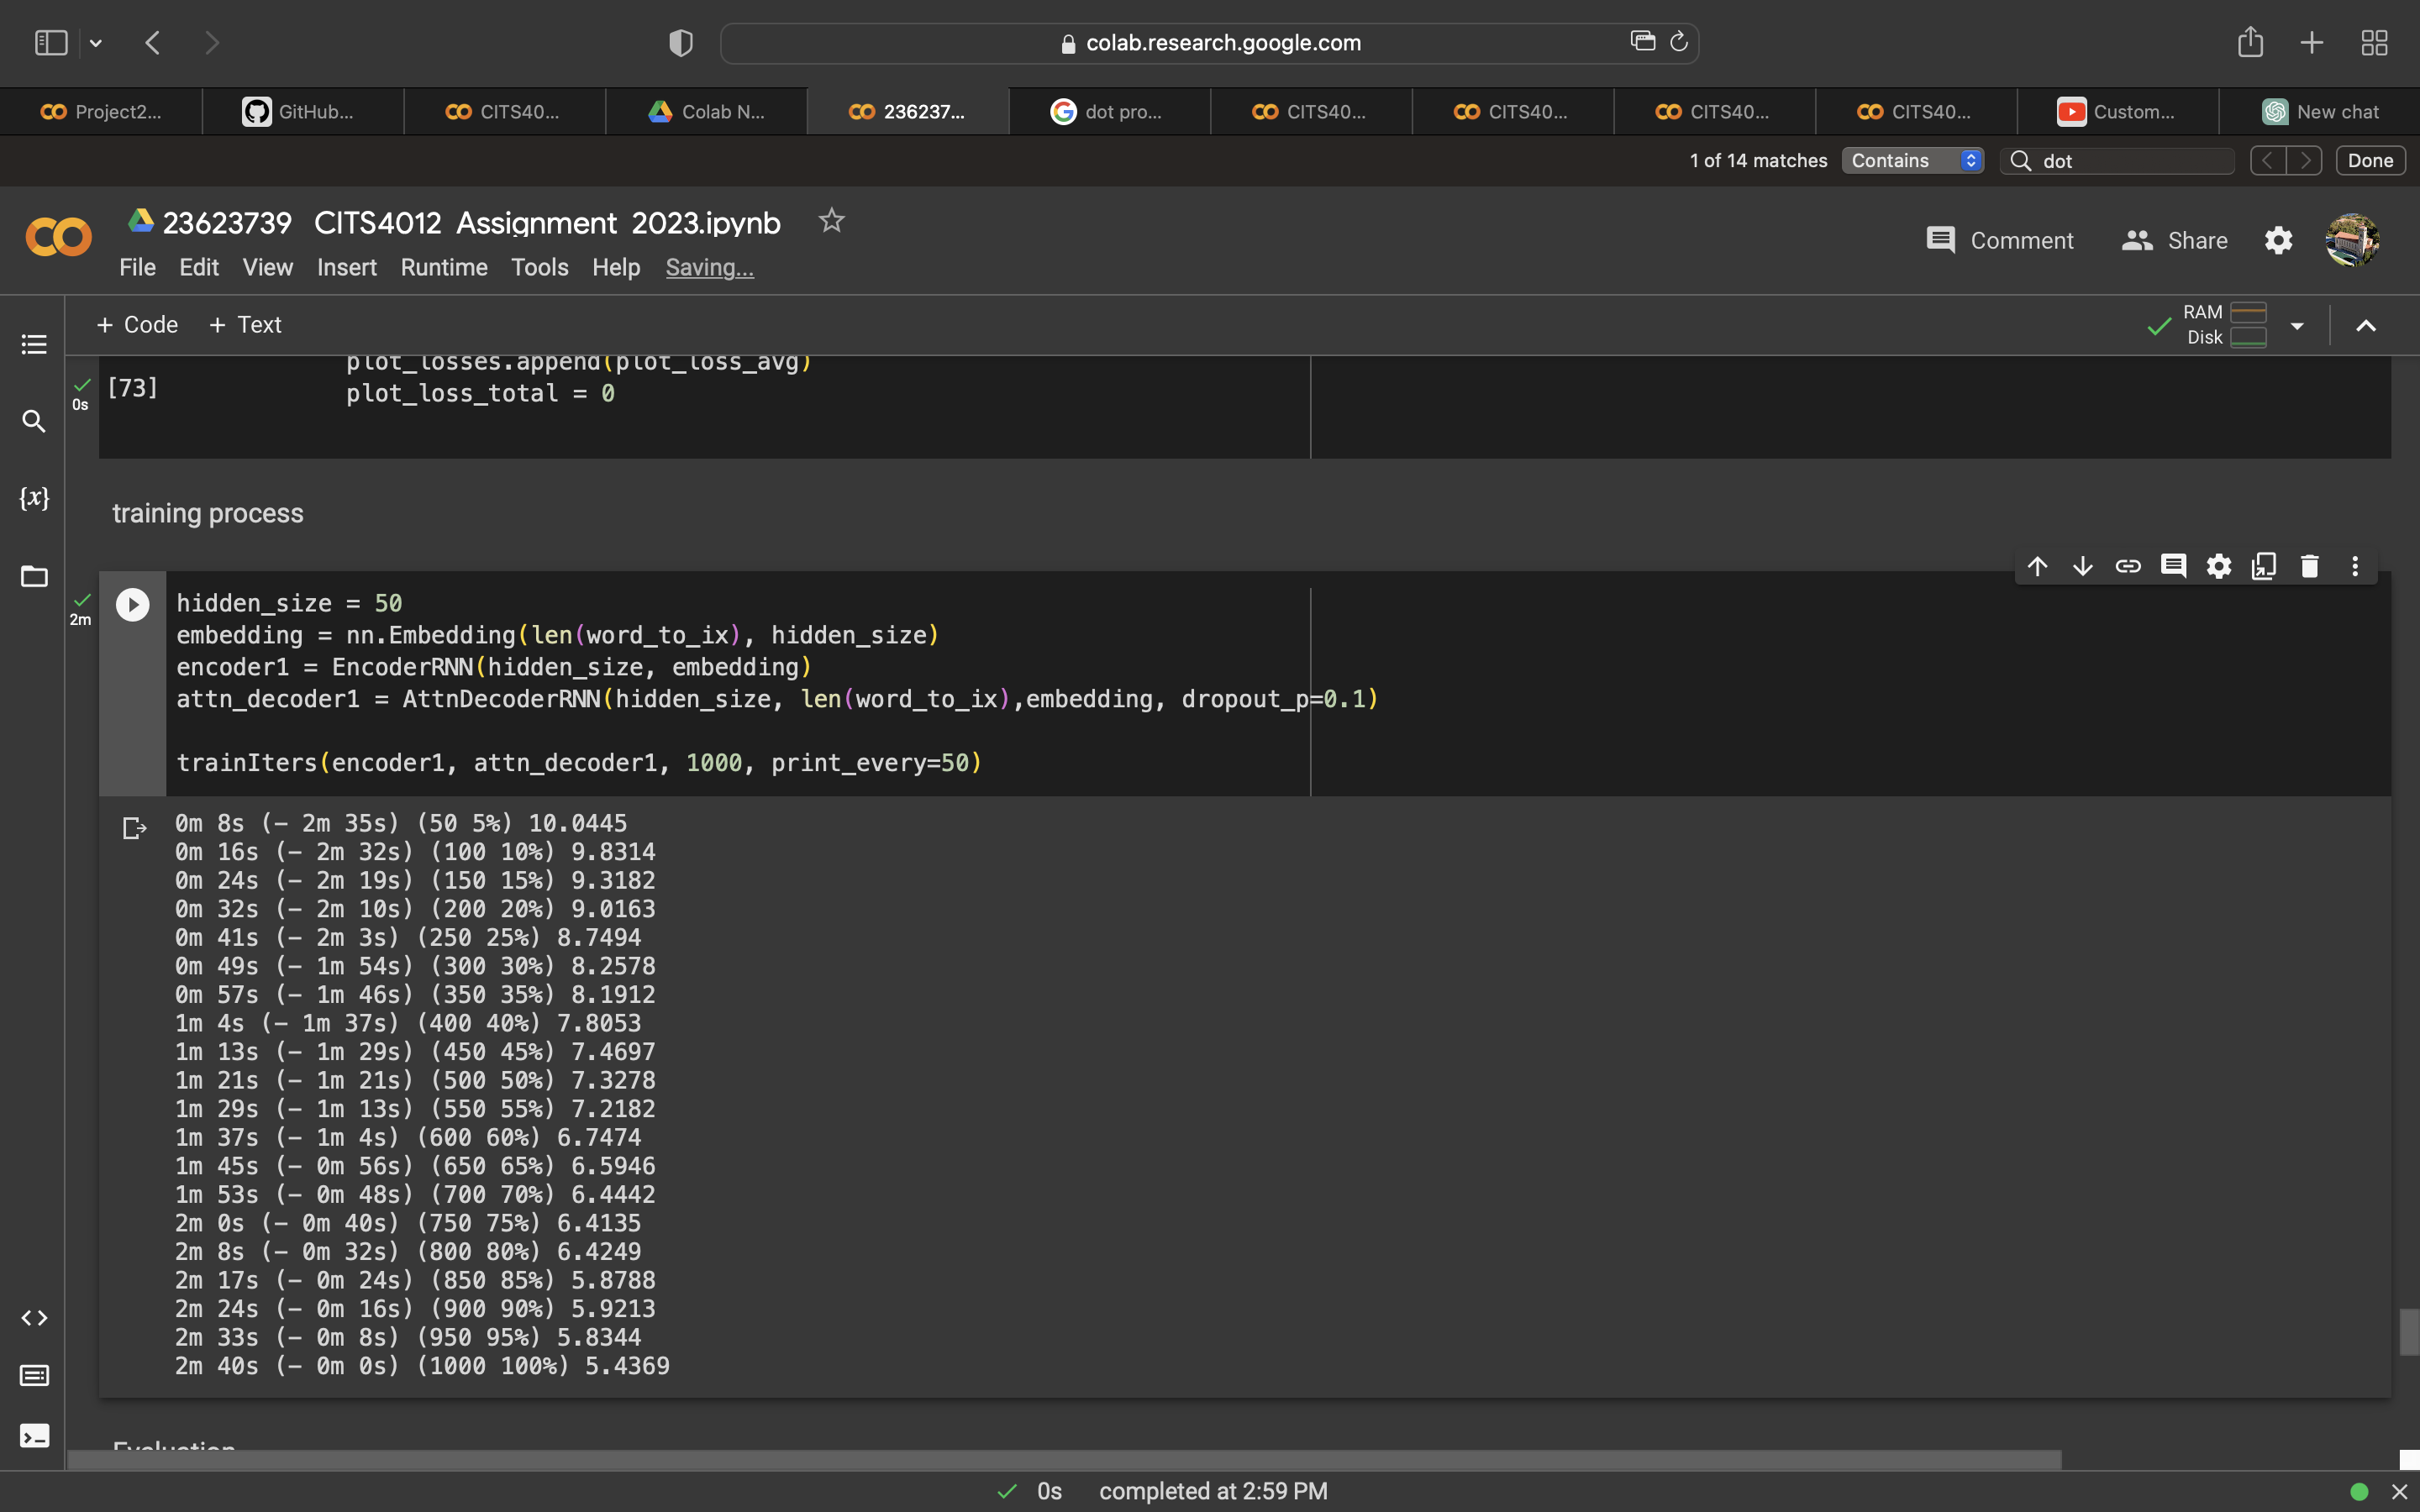

Evaluation

In [69]:
def evaluate(encoder, decoder, sentence, max_length=MAX_LENGTH):
    with torch.no_grad():
        input_sent = sentence[0]
        intput_index = [word_to_ix[word] for word in input_sent]
        input_tensor = torch.LongTensor([[ind] for ind in intput_index]).to(device)

        input_length = input_tensor.size()[0]
        encoder_hidden = encoder.initHidden()

        encoder_hiddens = torch.zeros(max_length, encoder.hidden_size, device=device)

        for ei in range(input_length):
            encoder_output, encoder_hidden = encoder(input_tensor[ei], encoder_hidden)
            encoder_hiddens[ei] += encoder_hidden[0, 0]

        decoder_input = torch.tensor([[word_to_ix["<BOS>"]]], device=device)  # SOS

        decoder_hidden = encoder_hidden

        decoded_words = []

        for di in range(max_length):
            decoder_output, decoder_hidden = decoder(decoder_input, decoder_hidden, encoder_hiddens)
            topv, topi = decoder_output.data.topk(1) # simply adopt the predicted tag with the highest probabiity
            if topi.item() == word_to_ix["<EOS>"]: # if <EOS> is generated, stop the generation
                decoded_words.append('<EOS>')
                break
            else:
                decoded_words.append(word_list[topi.item()]) # get the predicted word based on the index
            # use the predicted output as the input for the next time step generation
            decoder_input = topi.squeeze().detach()

        return decoded_words

In [72]:
print(evaluate(encoder1, attn_decoder1, question_list, max_length=MAX_LENGTH))

IndexError: ignored

previous output received:
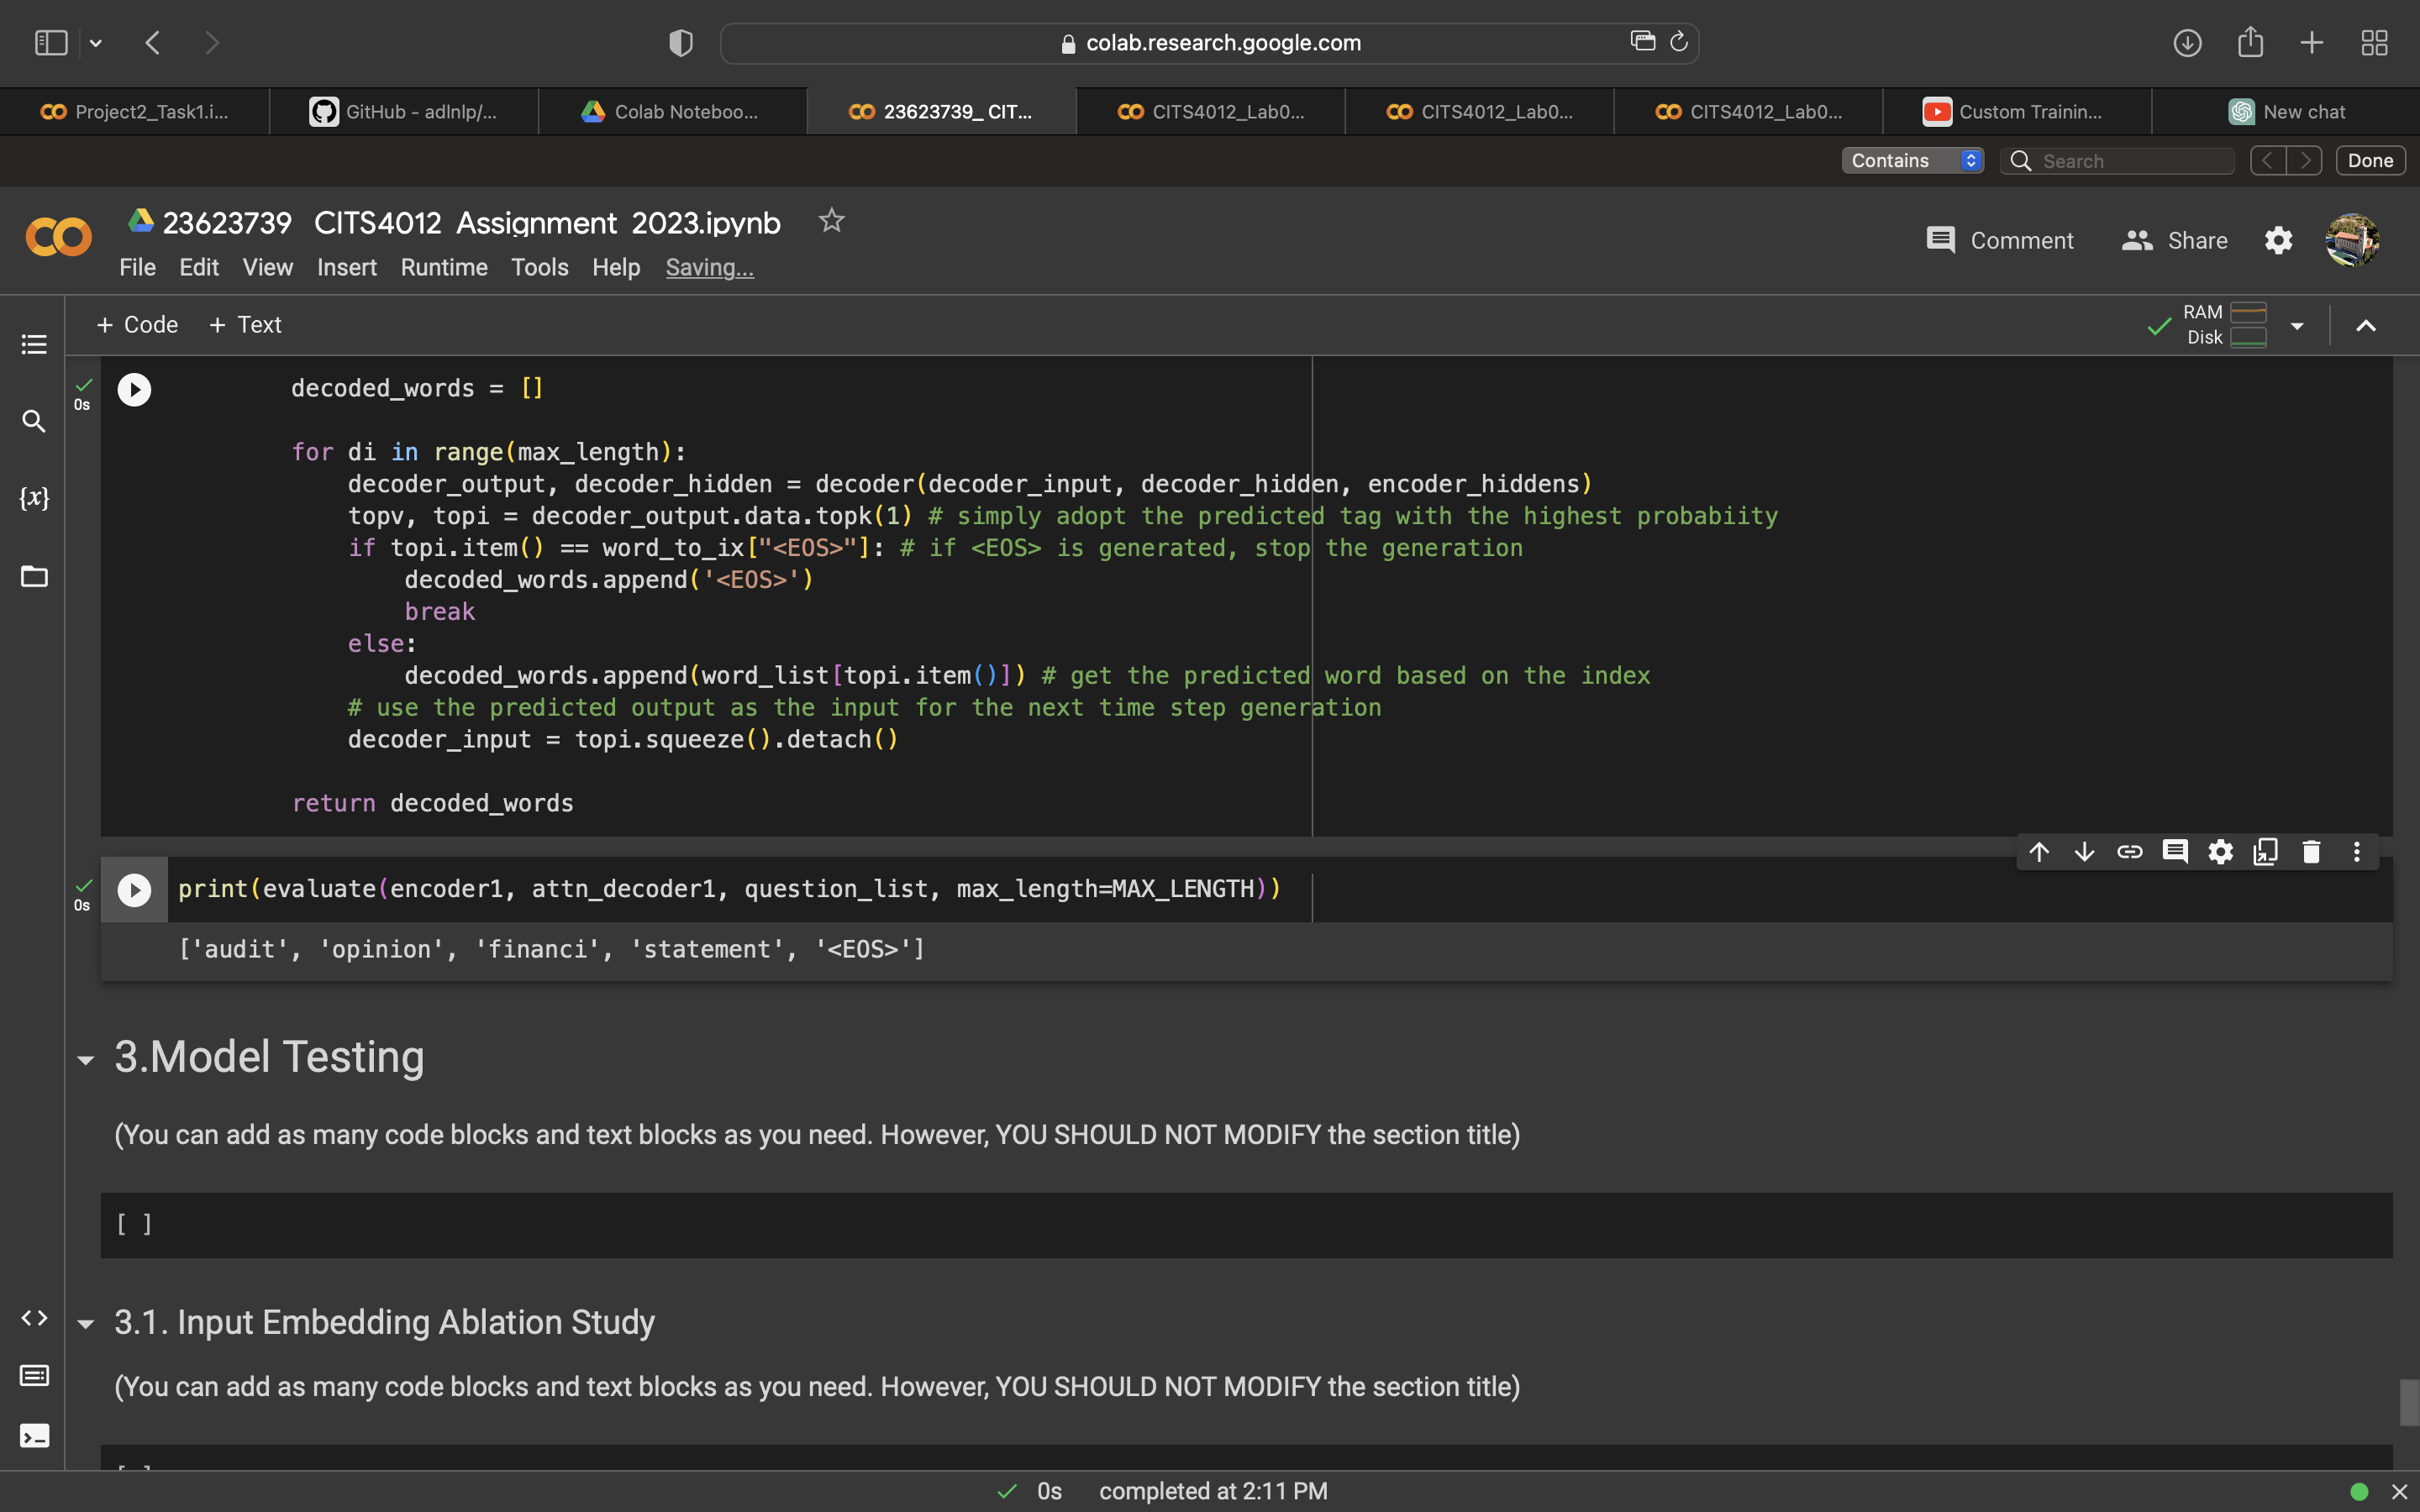

# 3.Model Testing
(You can add as many code blocks and text blocks as you need. However, YOU SHOULD NOT MODIFY the section title) 

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

In [75]:
#Label for testing dataset
test_labels = []
test_labels = test_df["Label"]
test_labels[2]

#Label for training dataset
train_labels = []
train_labels = train_df["Label"]
train_labels[2]

0

###3.1. Input Embedding Ablation Study

(You can add as many code blocks and text blocks as you need. However, YOU SHOULD NOT MODIFY the section title) 



In [76]:
# Calculate performance metrics for each variant
precision_scores = [precision_score(y_true, y_pred) for y_true, y_pred in zip(test_labels, train_labels)]
recall_scores = [recall_score(y_true, y_pred) for y_true, y_pred in zip(test_labels, train_labels)]
f1_scores = [f1_score(y_true, y_pred) for y_true, y_pred in zip(test_labels, train_labels)]

# Create a DataFrame with the results
data = {
    'Variant': ['Word2Vec Only', 'Word2Vec + POS', 'Word2Vec + TF-IDF'],
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1-Score': f1_scores
}
df = pd.DataFrame(data)

# Print the DataFrame
print(df)

# Create a bar plot for performance visualization
df.plot(x='Variant', y=['Precision', 'Recall', 'F1-Score'], kind='bar')
plt.title('Performance of Input Embedding Variants')
plt.xlabel('Variant')
plt.ylabel('Score')
plt.show()

TypeError: ignored

###3.2. Attention Ablation Study
(You can add as many code blocks and text blocks as you need. However, YOU SHOULD NOT MODIFY the section title) 

In [ ]:
print(evaluate(encoder1, attn_decoder1, ques_test_list, max_length=test_MAX_LENGTH))

# from sklearn.metrics import classification_report
# twenty_train = fetch_20newsgroups(subset='train',categories=categories, shuffle=True, random_state=42)

IndexError: ignored

previous output received:
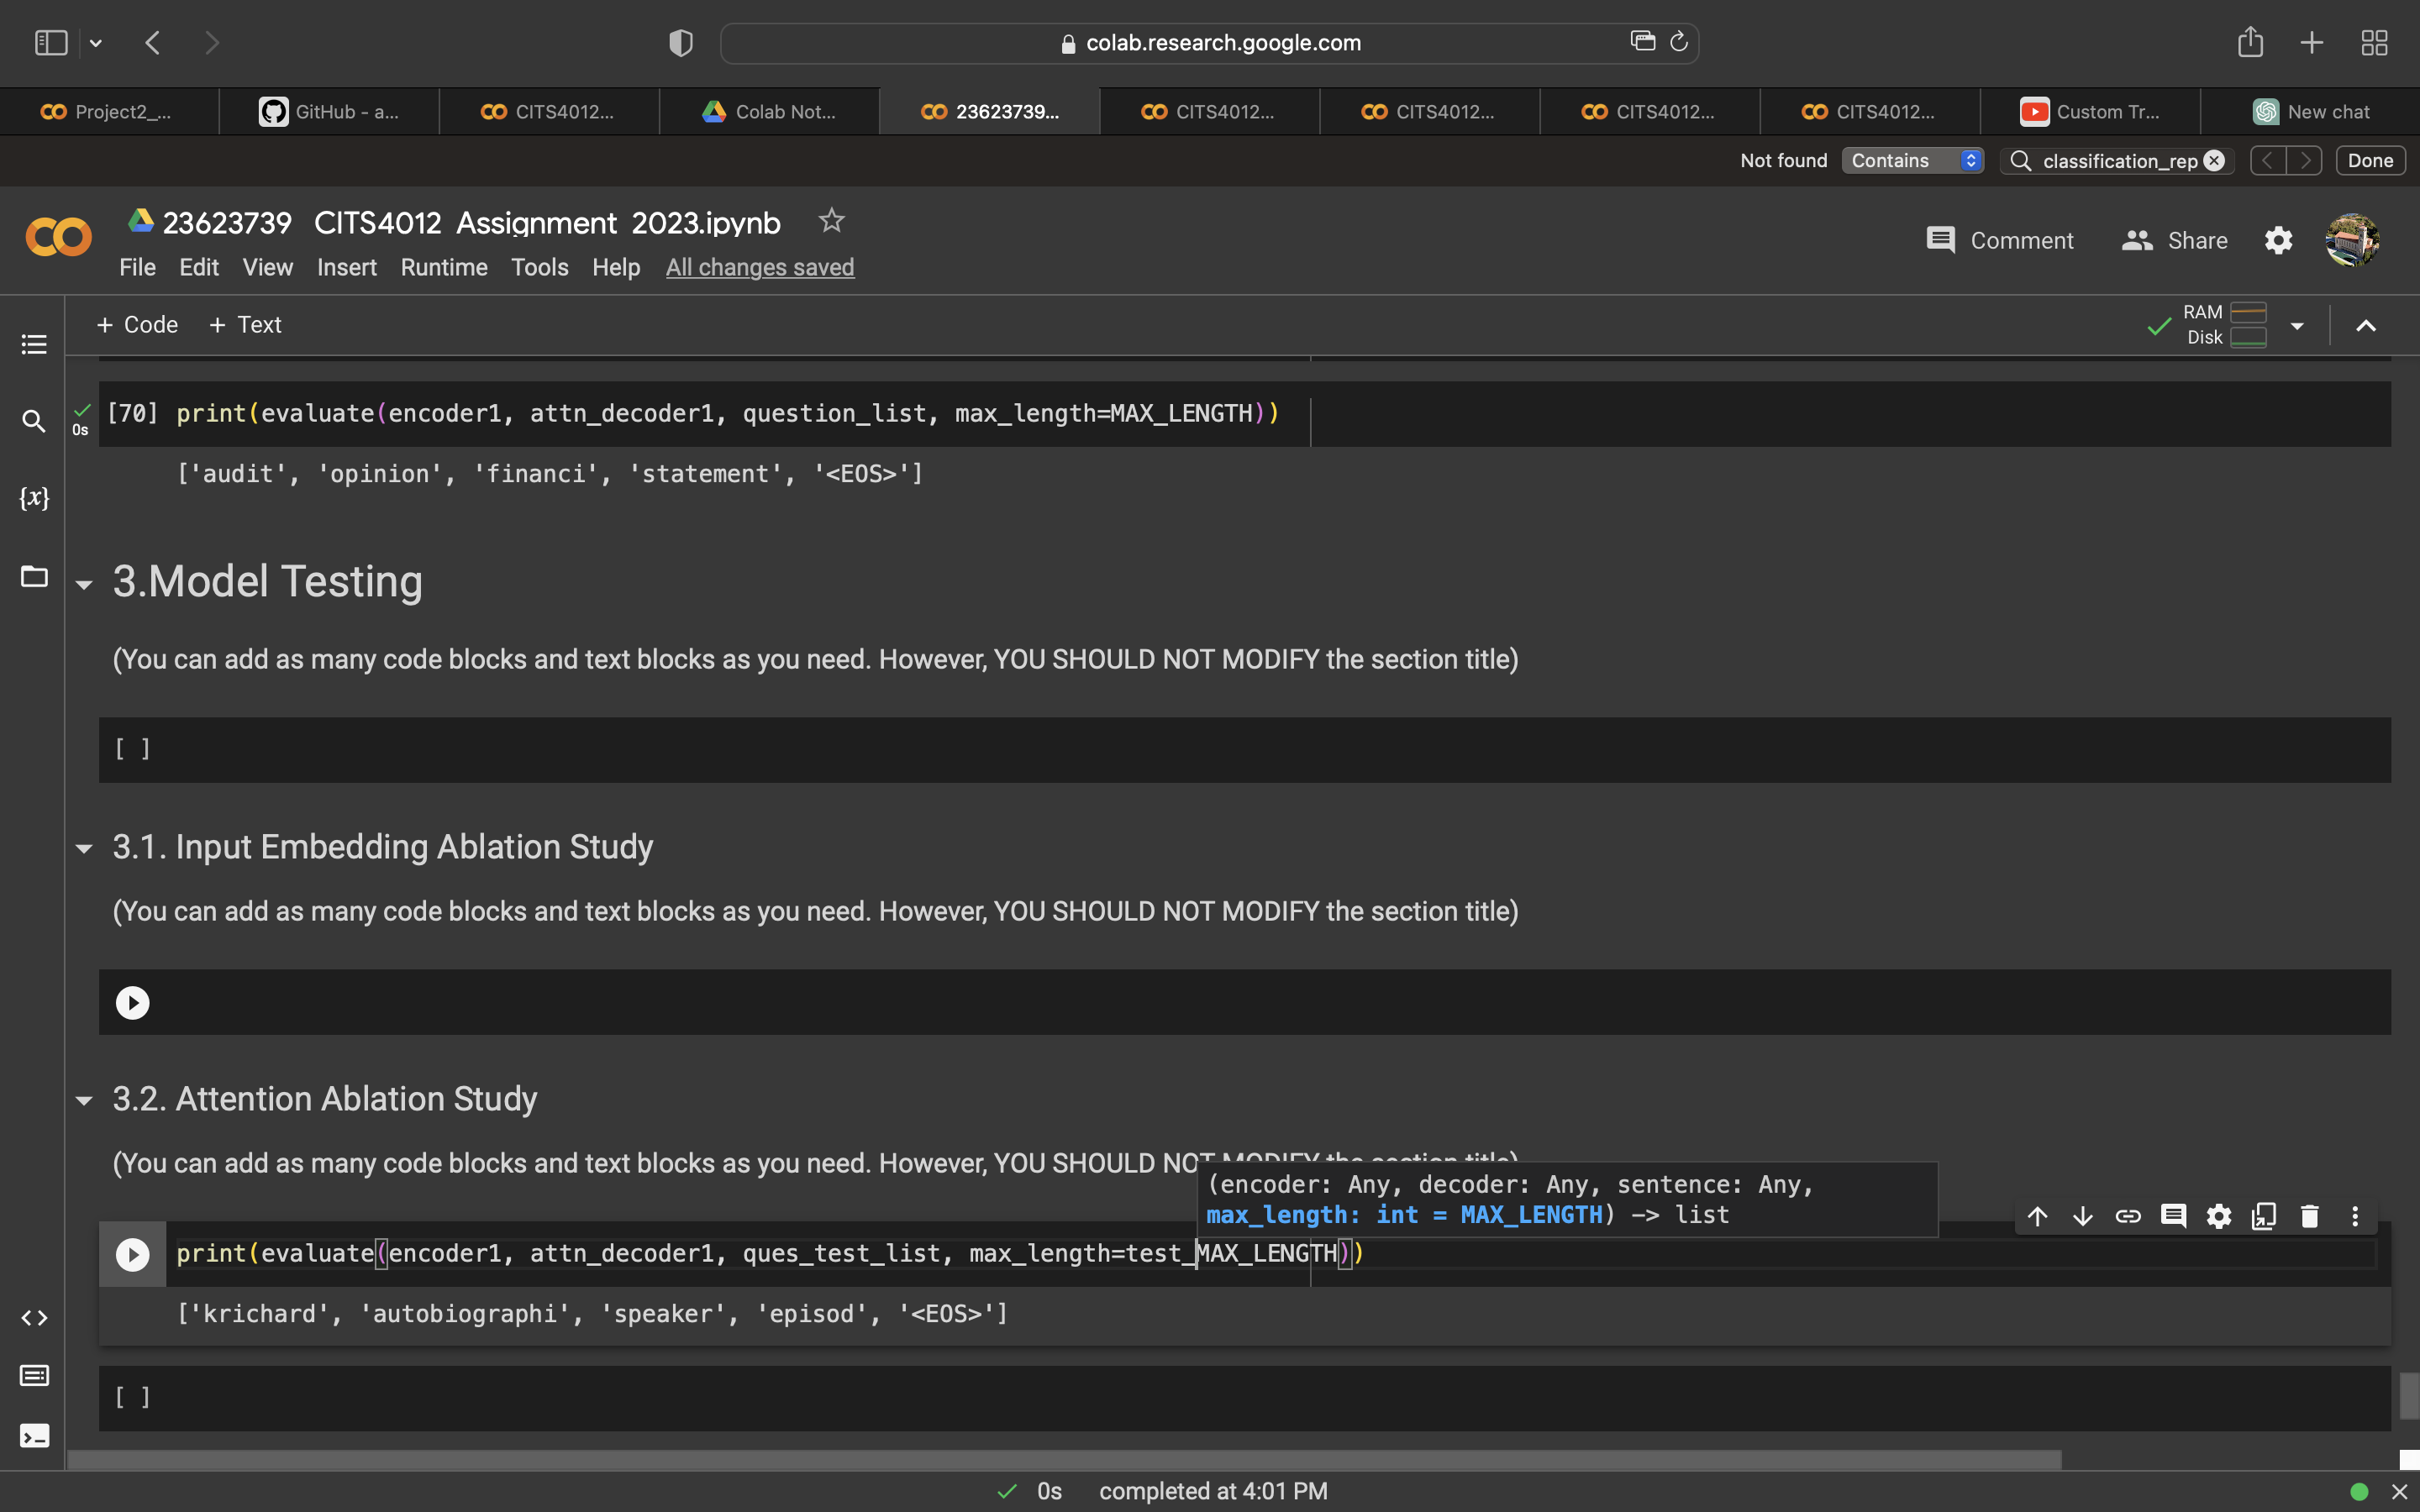

In [ ]:
true_labels = np.array(test_lab)

# # Calculate precision, recall, and F1-score for each attention variant
# attention_variants = ["Dot Product", "Scaled Dot Product", "Cosine"]
# precisions = []
# recalls = []
# f1_scores = []

# for predictions in [AttnDecoderRNN.ATTN_TYPE_DOT_PRODUCT, AttnDecoderRNN.ATTN_TYPE_SCALE_DOT_PRODUCT, AttnDecoderRNN.ATTN_TYPE_COSINE]:
#     precision = precision_score(true_labels, predictions)
#     recall = recall_score(true_labels, predictions)
#     f1 = f1_score(true_labels, predictions)
#     precisions.append(precision)
#     recalls.append(recall)
#     f1_scores.append(f1)


# # Visualize the results
# plt.figure(figsize=(8, 4))
# plt.bar(attention_variants, precisions, label='Precision')
# plt.bar(attention_variants, recalls, label='Recall')
# plt.bar(attention_variants, f1_scores, label='F1-score')
# plt.xlabel('Attention Variants')
# plt.ylabel('Score')
# plt.title('Performance of Attention Variants')
# plt.legend()
# plt.show()

In [ ]:
# Generate predictions for each attention variant
dot_product_predictions = evaluate(encoder1, attn_decoder1, ques_test_list, max_length=test_MAX_LENGTH)
scaled_dot_product_predictions = evaluate(encoder1, attn_decoder1, ques_test_list, max_length=test_MAX_LENGTH)
cosine_predictions = evaluate(encoder1, attn_decoder1, ques_test_list, max_length=test_MAX_LENGTH)

# Calculate precision, recall, and F1-score for each attention variant
precision_dot_product = precision_score(true_labels, dot_product_predictions, average='weighted')
recall_dot_product = recall_score(true_labels, dot_product_predictions, average='weighted')
f1_dot_product = f1_score(true_labels, dot_product_predictions, average='weighted')

precision_scaled_dot_product = precision_score(true_labels, scaled_dot_product_predictions, average='weighted')
recall_scaled_dot_product = recall_score(true_labels, scaled_dot_product_predictions, average='weighted')
f1_scaled_dot_product = f1_score(true_labels, scaled_dot_product_predictions, average='weighted')

precision_cosine = precision_score(true_labels, cosine_predictions, average='weighted')
recall_cosine = recall_score(true_labels, cosine_predictions, average='weighted')
f1_cosine = f1_score(true_labels, cosine_predictions, average='weighted')

IndexError: ignored

###3.3. Hyper Parameter Testing
(You can add as many code blocks and text blocks as you need. However, YOU SHOULD NOT MODIFY the section title) 

In [ ]:
from sklearn.metrics import accuracy_score

model = EncoderRNN().to(device)
criterion = nn.CrossEntropyLoss()

# Please find which optimizer provides a higher f1
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(total_epoch):
    train_loss = 0
    for ind in range(0,train_embeddings.shape[0],batch_size):
        input_batch = train_embeddings[ind:min(ind+batch_size, train_embeddings.shape[0])]
        target_batch = train_label[ind:min(ind+batch_size, train_embeddings.shape[0])]
        input_batch_torch = torch.from_numpy(input_batch).float().to(device)
        target_batch_torch = torch.from_numpy(target_batch).view(-1).to(device)

        model.train()
        optimizer.zero_grad()
        outputs = model(input_batch_torch) 
        loss = criterion(outputs, target_batch_torch)
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()

    print('Epoch: %d, train loss: %.5f'%(epoch + 1, train_loss))

print('Finished Training')

## Prediction
model.eval()
outputs = model(torch.from_numpy(test_embeddings).float().to(device)) 
predicted = torch.argmax(outputs, 1)

# classification_report builds a text report showing the main classification metrics
# The returned report includes the 'weighted avg f1' we want (refer to the sample output)
# More details can be found from: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
from sklearn.metrics import classification_report
print(classification_report([categories[i] for i in test_label], [categories[i] for i in predicted.cpu().numpy()], digits=4))